<a href="https://colab.research.google.com/github/JeongCheolHee/colab/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


[9 0 0]


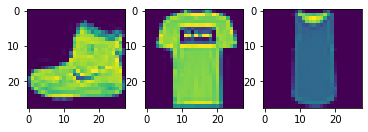

In [ ]:
fig = plt.figure() # 이미지를 여러 개 띄우기 위해 빈 공간 먼저 만들기
ax1 = fig.add_subplot(1, 3, 1) #1행 3열 짜리 중 첫 번째 
ax2 = fig.add_subplot(1, 3, 2) #2번째
ax3 = fig.add_subplot(1, 3, 3) #3번째
ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])
#각자 이미지가 정답인지 확인하기 위해 아래 작업 실시
print(train_labels[:3]) # [9 0 0]이 나온다 -> 부츠 티셔츠 티셔츠


In [ ]:
model = tf.keras.Sequential([                    
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 2.9950 - accuracy: 0.6803
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6947 - accuracy: 0.7213
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5789 - accuracy: 0.7858
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5385 - accuracy: 0.8101
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5239 - accuracy: 0.8178


In [ ]:
model.evaluate(test_images, test_labels, verbose = 2) #model 평가하기

313/313 - 1s - loss: 0.6001 - accuracy: 0.7904 - 614ms/epoch - 2ms/step


[0.6001378297805786, 0.7904000282287598]

(10000, 28, 28)
1
(10000,)


1

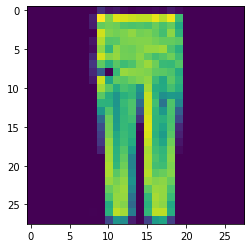

In [ ]:
print(test_images.shape)
plt.imshow(test_images[200])
print(test_labels[200])
print(test_labels.shape)
model.predict(test_images[200][np.newaxis,:,:])
np.argmax(model.predict(test_images[200][np.newaxis,:,:])) #가장 예측 잘한거 출력해준다 = 확률이 가장 높은 것을 출력해준다

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd #현재 작업하고 있는 폴더가 어딘지
!ls  ./drive/'My Drive' -la

/content
total 1324
-rw------- 1 root root  73930 Apr 12  2021  bag_cartoon.png
drwx------ 2 root root   4096 May 29 13:32 'Colab Notebooks'
-rw------- 1 root root 665719 Jun  2 17:55  image.zip
-rw------- 1 root root 598385 Apr 12  2021  myData.png
-rw------- 1 root root   5602 Jul 26  2021  README.md
-rw------- 1 root root   6149 Jul 26  2021  syllabus.md


(743, 916, 4)
(28, 28, 4)


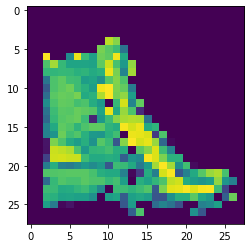

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('./drive/My Drive/myData.png') #google drive에 있는 myData.png 이미지 불러오기
plt.imshow(img) #불러온 이미지 확인하기
print(img.shape) # 28 by 28 이 아니다 28by28로 바꿔줘야함
import cv2
img = mpimg.imread('./drive/My Drive/myData.png', cv2.IMREAD_GRAYSCALE) #IMREAD_GRAYSCALE가 잘먹지 않음;;;
plt.imshow(img)
img = cv2.resize(img, (28, 28))  # 이미지 resize 작업
plt.imshow(img[:,:,1])
print(img.shape)#사이즈가 28 x 28로 바뀜

In [ ]:
input_data = img[np.newaxis, :, :, 1]
print(input_data.shape)


np.argmax(model.predict(input_data)) #최대값을 갖는 범주 = 8 <- bag 잘못된 값을 추정함

(1, 28, 28)


8

(1, 28, 28)


()

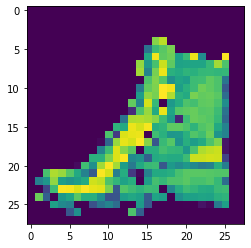

In [ ]:
image_mirror = input_data[:,:,::-1] #기존 이미지를 좌우 대칭 시킴 
print(image_mirror.shape)
plt.imshow(image_mirror[0])
np.argmax(model.predict(image_mirror)) #최대값을 갖는 범주 = 9 <- 부츠 정확히 추정함

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (28, 28)),
      tf.keras.layers.Dense(128, activation = 'relu'), 
      tf.keras.layers.Dense(64, activation = 'relu'), 
      tf.keras.layers.Dense(32, activation = 'relu'), 
      tf.keras.layers.Dense(10, activation = 'softmax') 
])
model2.summary()
model2.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model2.fit(train_images, train_labels, epochs = 5)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               100480    
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [===========================

In [ ]:
model2.evaluate(test_images, test_labels, verbose =2 )

313/313 - 1s - loss: 0.4370 - accuracy: 0.8454 - 738ms/epoch - 2ms/step


[0.4370315372943878, 0.8453999757766724]

In [ ]:
pred_1 = model.predict(test_images)
pred_2 = model2.predict(test_images)
print(pred_1)
print(pred_2) 
print(pred_1.shape)
print(pred_2.shape)

[[2.7143123e-17 5.8362853e-18 0.0000000e+00 ... 1.3017610e-01
  8.9298154e-13 8.3618873e-01]
 [1.0419625e-02 3.9457888e-04 7.4586600e-01 ... 1.7218780e-21
  5.2535008e-05 9.3732379e-13]
 [1.7776008e-08 9.9999130e-01 4.3642814e-09 ... 0.0000000e+00
  8.7201943e-06 3.6871351e-24]
 ...
 [1.1632447e-03 5.7506757e-15 2.8041404e-05 ... 3.0461498e-04
  9.5599580e-01 1.9096215e-06]
 [6.5876842e-09 9.9999261e-01 8.0954010e-10 ... 0.0000000e+00
  6.8822696e-06 1.4990247e-25]
 [1.9176857e-10 3.0755560e-13 5.1894009e-09 ... 5.0023474e-02
  1.4603625e-03 1.4324361e-03]]
[[2.0452746e-13 3.1501295e-09 1.9181283e-09 ... 4.1308174e-01
  2.8486100e-05 5.6212658e-01]
 [1.8494783e-04 4.6384332e-09 9.6934164e-01 ... 4.7222624e-25
  5.2529220e-05 4.1280230e-22]
 [1.3957782e-09 9.9999678e-01 1.3079317e-14 ... 0.0000000e+00
  2.0748275e-30 5.3490317e-21]
 ...
 [9.3731833e-06 2.3948774e-11 2.6645142e-05 ... 2.1801879e-06
  9.9995887e-01 2.3187054e-13]
 [9.4926418e-06 9.9988770e-01 1.1036251e-08 ... 2.0553045e-

In [ ]:
yhat1 = np.argmax(pred_1, axis =1) # ,row 별로 확률이 가장 높은 것 출력
yhat2 = np.argmax(pred_2, axis =1)
print(yhat1.shape)
print(yhat2.shape)
print(yhat1)
print(yhat2)

(10000,)
(10000,)
[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 8]


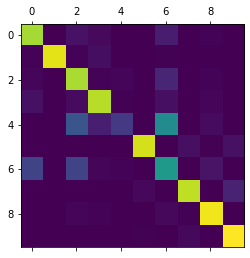

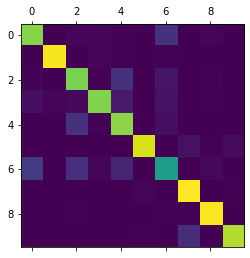

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat1 = confusion_matrix(test_labels, yhat1)
conf_mat2 = confusion_matrix(test_labels, yhat2)
plt.matshow(conf_mat1)
plt.matshow(conf_mat2)

In [ ]:
print(type(yhat1))
print(type(test_labels))
print(np.corrcoef(test_labels, yhat1))
print(np.corrcoef(test_labels, yhat2)) # layers를 추가한 것이 corr 값이 조금 더 크게 나온다

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[1.         0.86175903]
 [0.86175903 1.        ]]
[[1.         0.87174522]
 [0.87174522 1.        ]]


In [ ]:
model2.save('./drive/My Drive/myFirstModel_cheolH.h5')

In [ ]:
!ls './drive/My Drive' -la

total 2666
-rw------- 1 root root   73930 Apr 12  2021  bag_cartoon.png
drwx------ 2 root root    4096 May 29 13:32 'Colab Notebooks'
-rw------- 1 root root  665719 Jun  2 17:55  image.zip
-rw------- 1 root root  598385 Apr 12  2021  myData.png
-rw------- 1 root root 1374640 Jun  4 18:24  myFirstModel_cheolH.h5
-rw------- 1 root root    5602 Jul 26  2021  README.md
-rw------- 1 root root    6149 Jul 26  2021  syllabus.md


In [ ]:
model_imported = tf.keras.models.load_model('./drive/My Drive/myFirstModel_cheolH.h5')
model_imported.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               100480    
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


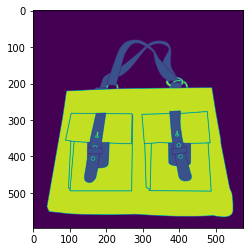

In [ ]:
import cv2
img = cv2.imread('./drive/My Drive/bag_cartoon.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

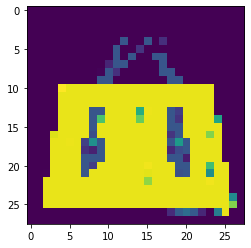

In [ ]:
img = cv2.resize(img, (28,28))
plt.imshow(img)

In [ ]:
input_data = img[np.newaxis, :,:]
print(input_data.shape)
np.argmax(model_imported.predict(input_data))

(1, 28, 28)


8